# Dimensionality Reduction

- This is where dimensionality reduction techniques come into play. 
- This is simply reducing the dimension of your feature set.
- This technique allows you to find a small set of most impactful features among a large number of features.
- With this small set of principal features, you can run your prediction algorithms easily with better accuracy.

## Techniques
1. Feature Selection
2. Feature Extraction

## Feature Extraction Methods
- This technique tries to reduce the number of features by creating new features from the existing ones.
- Then it discards the original features.
- The newly built set of features contain must of the crucial information in the dataset

## Methods
1. Principal Component Analysis (PCA)
2. Linear discriminant Analysis (LDA)
3. Kernal PCA

## Principal Component Analysis (PCA)
- Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

## Step 1 : Import libraries and load dataset

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

## Step 2 : Explore and Standardize the Dataset

In [21]:
# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [22]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3 : Apply PCA

In [23]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

## Step 4 : Visualize PCA Output in 2D

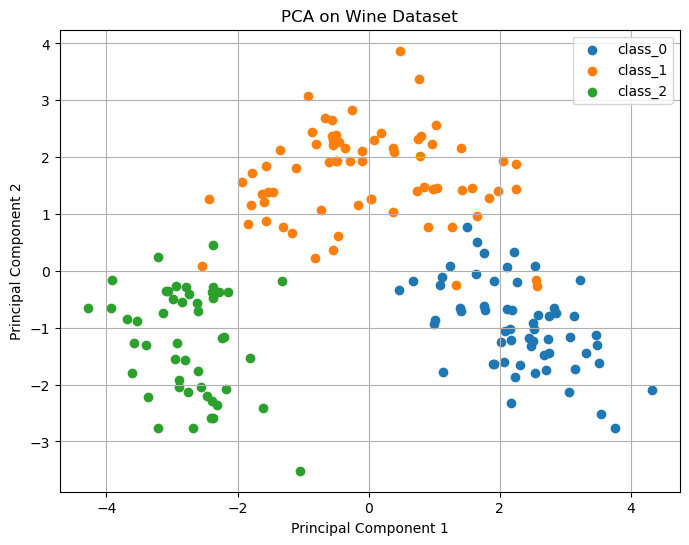

In [24]:
# Plot the PCA-transformed data
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

## Step 5 : Explained Variance Ratio & Screen Plot

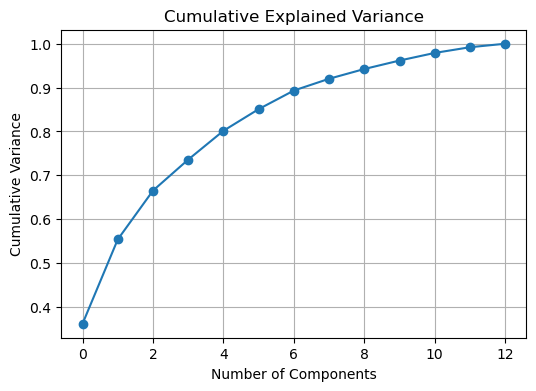

In [25]:
pca_full = PCA().fit(X_scaled)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()